# 1.广义线性模型
对于输入向量$x=(x_1,x_2,\cdots,x_p)$,并希望预测出实数值输出Y。线性模型形如： 
$$f(x)=\theta_0+\sum_{i=1}^p x_i\theta_i $$  
线性模型假定回归函数E(Y|x)是线性的，或者假定线性模型是一个合理的近似。

### 1.1 普通最小二乘
线性回归最小化数据中观察到的响应和通过线性逼近预测的响应之间的残差平方和来拟合系数为$\theta=(\theta_0,\theta_1,\cdots,\theta_p)$的线性模型。从数学上来说，它解决了形式上的问题：  $$J(\theta)=\dfrac{1}{2}\sum_i(y^{(i)}-\theta^Tx^{(i)})^2$$
记X为$n\times (p+1)$矩阵，每行代表一个输入向量。则
写成矩阵形式,目标函数如下：
$$ \min\limits_{\theta}\dfrac{1}{2}\lVert X\theta - y \rVert_2^2$$
这是$p+1$个参数的二次函数。  
数学推导：
\begin{aligned}
\dfrac{1}{2}\lVert X\theta - y \rVert_2^2&=\dfrac{1}{2}(X\theta-y)^T(X\theta-y)\\
&=\dfrac{1}{2}(\theta^TX^T-y^T)(X\theta-y)\\
&=\dfrac{1}{2}\theta^TX^TX\theta-\theta^TX^Ty+\dfrac{1}{2}y^Ty
\end{aligned}
对$\theta$求导，得$X^T(X\theta-y)$,令其等于0，可以得到系数向量$\theta$的估计值，如下：  
$$\hat{\theta}=(X^TX)^{-1}X^Ty$$
上述公式包含矩阵$\ X^TX$的逆，因此这个估计只在该逆矩阵存在的情况下适用,此时得到惟一解。    
在训练输入上的拟合值是：  
$$\hat{y}=X\hat{\theta}=X(X^TX)^{-1}X^Ty$$  
其中，$\hat{y_i}=\hat{f}(x_i)$.上式中的矩阵$H=X(X^TX)^{-1}X^T$又称为“帽子”矩阵，因为它在y上加了一个‘帽’。

## 另一种理解：  
用$X_0,X_1,\cdots,X_p$记X的列向量，其中$X_0=1$,这些列向量生成$IR^n$的一个子空间，也称X的列空间。通过选取$\hat{\theta}$使得残差向量$y-\hat{y}$正交于该子空间，我们对
$RSS(\theta)=\dfrac{1}{2}\lVert X\theta - y \rVert_2^2$极小化。  
该正交性在一阶导数为0，即$X^T(X\theta-y)=0$时表达，并且估计$\hat{y}$是y在该子空间上的正交投影。帽子矩阵H计算该正交投影，因此也称为投影矩阵。

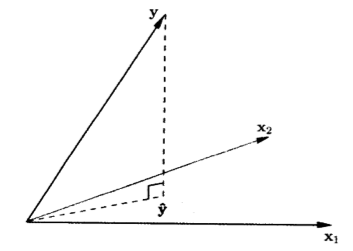

In [3]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/1.png")

上图表示具有两个预测子的最小二乘回归的集合表示。向量y正交投影到由输入向量$x_1$和$x_2$生成的超平面上。投影$\hat{y}$表示最小二乘预测向量。

In [3]:
import numpy as np
def ols_fit(X,y):
    n=len(y)
    Xmat=np.hstack((np.ones((n,1)),np.mat(X)))
    ymat=np.mat(y).T
    xTx=Xmat.T*Xmat
    if np.linalg.det(xTx) == 0:
        print('This matrix is singular')
        return
    Theta=xTx.I*(Xmat.T*ymat)
    return Theta

#### 1.1.1思考最小二乘法的概率解释
提示：最大似然

### 注意：
普通最小二乘在求解系数时需要计算矩阵的逆，当特征个数很多时，计算量很大并且计算会变慢。  
普通最小二乘的系数估计依赖于模型项的独立性。当各项具有相关性且设计矩阵x的列具有近似线性相关时，设计矩阵接近于奇异，因此，最小二乘估计变得对所观察到的响应中的随机误差高度敏感，产生大的方差。这种情况可能出现多重共线性。以下将说明这种情况。

当解集$\omega$对X,y的值十分敏感时，那么这样的方程组就是病态的。X称为病态矩阵。仅仅是在X上和y上进行了微小变动，得出的系数值就差异巨大。如下例：

In [6]:
X=[[0,0],[1,1],[2,2]]
y=[0,1,2]
w=ols_fit(X,y)
print('w is :\n',w)
X1=[[0,0],[1,1.1],[2,2]]
y1=[0,1,2]
w1=ols_fit(X1,y1)
print('w1 is :\n',w1)
X2=[[0,0],[1,1],[2.1,2]]
y2=[0,1,2]
w2=ols_fit(X2,y2)
print('w2 is :\n',w2)
X3=[[0,0],[1,1.1],[2,2]]
y3=[0,1.1,2]
w3=ols_fit(X3,y3)
print('w3 is :\n',w3)

This matrix is singular
w is :
 None
w1 is :
 [[ -1.84741111e-13   1.00000000e+00   0.00000000e+00]]
w2 is :
 [[ -2.34479103e-13   0.00000000e+00   1.00000000e+00]]
w3 is :
 [[ -1.84741111e-13   1.13686838e-13   1.00000000e+00]]


## 总结：
X的列向量可能不是线性独立的，从而X不是满秩的。例如，如果两个输入是完全相关的$(X_2=3X_1)$，这种情况将会发生。这时，$X^TX$是奇异的，并且最小二乘方系数$\hat{\theta}$不是唯一确定的。然而，拟合值$\hat{y}=X\hat{\theta}$仍然是y到X的列空间上的投影，只不过存在多种用X向量表示y投影的方法。  
当特征个数p>训练实例个数n时，X也是不满秩的。在这种情况下，通常使用过滤减少特征，否则用正则化控制拟合。  

### 1.2 梯度下降算法
梯度下降算法或最速下降法是求解无约束最优化问题的一种常用方法，有实现简单的优点。  
在本节中适用于回归问题中特征数过大以及$X^TX$矩阵奇异的情况。  
算法思想：梯度下降算法是一种迭代算法。选取适当的初值$\theta^{(0)}$,不断迭代,更新$\theta$的值，进行目标函数的极小化，直至收敛。由于负梯度方向是使函数值下降最快的方向，所以在迭代的每一步，以负梯度方向更新$\theta$的值，从而达到减少函数值的目的。  
梯度下降算法的迭代公式的矩阵形式如下：  
$$\theta:=\theta-\alpha\dfrac{\partial{J(\theta)}}{\partial\theta}$$
这里$\dfrac{\partial{J(\theta)}}{\partial\theta}=X^T(X\theta-y)$

算法伪代码：  
输入：目标函数，梯度函数，计算精度$\epsilon$  
输出：函数的(局部)极小值点  
初始化回归系数  
重复R次：  
  (1)计算整个数据集的梯度  
  (2)使用alpha$\times$gradient更新回归系数的向量  
  (3)返回回归系数

In [4]:
np.ones((3,1))

array([[ 1.],
       [ 1.],
       [ 1.]])

In [1]:
import numpy as np
def GradDescent(X,y,epsilon):
    n=len(y)
    Xmat=np.hstack((np.ones((n,1)),np.mat(X)))
    ymat=np.mat(y).T
    alpha=0.001
    maxcycles=5000 # 循环次数足够大才能收敛
    weights=np.zeros((n,1)) #初始化系数均为0
    count=0
    for i in range(maxcycles):
        if np.linalg.norm(Xmat.T*(Xmat*weights-ymat),2)>epsilon:
            weights=weights-alpha*Xmat.T*(Xmat*weights-ymat)
        else:
            weights=weights
    return weights

In [2]:
X=[[0,0],[1,1],[2,2]]
y=[0,1,2]
w=GradDescent(X,y,0.01)
print('w is :\n',w)
X1=[[0,0],[1,1.1],[2,2]]
y1=[0,1,2]
w1=GradDescent(X1,y1,0.01)
print('w1 is :\n',w1)
X2=[[0,0],[1,1],[2.1,2]]
y2=[0,1,2]
w2=GradDescent(X2,y2,0.01)
print('w2 is :\n',w2)
X3=[[0,0],[1,1.1],[2,2]]
y3=[0,1.1,2]
w3=GradDescent(X3,y3,0.01)
print('w3 is :\n',w3)

w1 is :
 [[-0.00672719  0.50216457  0.49110995]]
w2 is :
 [[ 0.01741171  0.49499234  0.47411931]]
w3 is :
 [[ 0.02462228  0.49098817  0.50387957]]


## 1.3 局部加权线性回归(LWLR)
现实生活中很多数据采用线性模型(出现欠拟合)不能很好的描述，比如说房价的预测问题，直线不能很好的拟合所有的数据点，甚至存在较大的误差，我们可能采用一条类似于二次函数的曲线可以拟合的更好。通常使用多项式能拟合所有的数据，但是在预测新样本的时候又会变得很糟糕，容易过拟合，不符合数据真实的模型。  
局部加权线性回归是机器学习里的一种经典的非参数学习方法，弥补了普通线性回归模型欠拟合或者过拟合的问题。思想：我们预测一点的值时，选择与这个点相近的点而不是所有的点做线性回归。   
在该算法中，我们给待预测点附近的每一个点赋予一定的权重，在这个子集上基于最小均方差进行普通的回归。与knn一样，这种算法每次预测时均需要事先选取出对应的数据子集。
残差平方和(损失函数)变为:
$$J(\theta)=\dfrac{1}{2}\sum_i\omega^{(i)}(y^{(i)}-\theta^Tx^{(i)})^2$$
写成矩阵形式，目标函数如下：
$$\min\limits_w\dfrac{1}{2}(X\theta-y)^TW(X\theta-y)$$
数学推导如下：
\begin{aligned}
\dfrac{1}{2}(X\theta-y)^TW(X\theta-y)&=\dfrac{1}{2}(\theta^TX^T-y^T)W(X\theta-y)\\
&=\dfrac{1}{2}\theta^TX^TWX\theta-\theta^TX^TWy+\dfrac{1}{2}y^TWy\\
\end{aligned}
对函数求导，得：$X^TWX\theta-X^TWy$,令其等于0，得到回归系数的估计值如下：
$$\hat{\theta}=(X^TWX)^{-1}X^TWY$$
LWLR使用‘核’来对附近的点赋予更高的权重。核的类型可以自由选择，最常见的核就是高斯核，对应的权重如下：
$$\omega^{(i)}=exp(-\dfrac{(x^{(i)}-x)^2}{-2k^2})$$
这样就构建了一个只含对角元素的权重矩阵，并且x与$x^{(i)}$点越近权重越大。其中，k为波长参数，它控制了权值随距离下降的速率。

### 1.3.1 参数和非参数学习算法
参数学习算法：在训练完成所有数据后得到一系列训练参数，然后根据训练参数来预测新样本的值，这时不再依赖之前的训练数据来，参数值是确定的。  
非参数学习算法：在预测新样本值时每次都会重新训练数据得到新的参数值，也就是说每次预测样本都会依赖训练数据集合，所以每次得到的参数值是不确定的。  
普通的线性回归属于参数学习算法，局部加权线性回归属于非参数学习算法。  

### 注意
在使用这个算法训练数据时，不仅需要学习线性回归的参数，还要学习波长参数。这个算法的问题在于，对于每一个要预测的点，都要依据整个数据集计算一个线性回归模型出来，使得算法代价极高。

In [26]:
import numpy as np
def lwlr(testpoint,X,y,k=1.0):
    n=len(y)
    Xmat=np.hstack(np.ones((n,1)),np.mat(X))
    ymat=np.mat(y).T
    weights=np.mat(np.eye((n)))
    for i in range(n):
        diffmat=testpoint-Xmat[i,:]
        weights[i,i]=np.exp(diffmat*diffmat.T/(-2.0*k**2))
    xTwx=Xmat.T*weights*Xmat
    if np.linalg.det(xTwx)==0:
        print('This matrix is singula')
        return
    theta=xTwx.I*(Xmat.T*weights*ymat)
    return testpoint*theta
def lwlrtest(testArr,X,y,k=1.0):
    m=testArr.shape[0]
    y_pred=np.zeros(m)
    for i in range(m):
        y_pred[i]=lwlr(testArr[i],X,y,k)
    return y_pred

## 自己找数据集模拟尝试一下

## 衡量效果 方差分数
## 优缺点 
优点：结果易于理解，计算不复杂  
缺点：对非线性数据拟合不好  
适用数据类型：数值型和标称型  

## 之后要介绍学习曲线的东西
测试集跟训练集的学习曲线的接近程度   
解释欠拟合，过拟合